# TEXT EMOTION DETECTION

# AI sentence Generator

https://www.summarizer.org/sentence-generator

# Dataset 

https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text/data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the dataset

In [7]:
df = pd.read_csv(r"D:\Modern ACA\NLP\NLP project\EMOrec 2 test\data\emotion_sentimen_dataset.csv")

In [8]:
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [11]:
df['Emotion'].value_counts()

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

In [30]:
df.count()

text          839555
Emotion       839555
Clean_Text    839555
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839555 entries, 0 to 839554
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        839555 non-null  object
 1   Emotion     839555 non-null  object
 2   Clean_Text  839555 non-null  object
dtypes: object(3)
memory usage: 19.2+ MB


<Axes: xlabel='Emotion'>

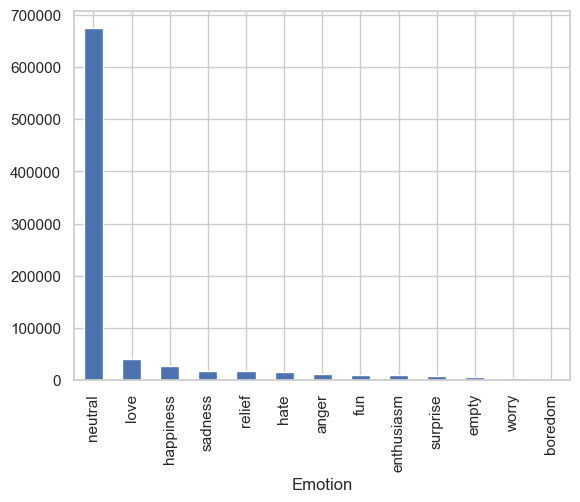

In [31]:
df.info()
df.describe()
df['Emotion'].value_counts().plot(kind='bar')

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(inplace=True)

In [13]:
emotions = df['Emotion'].unique()
emotions


array(['hate', 'neutral', 'anger', 'love', 'worry', 'relief', 'happiness',
       'fun', 'empty', 'enthusiasm', 'sadness', 'surprise', 'boredom'],
      dtype=object)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10180\4075499751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', palette='Set2')


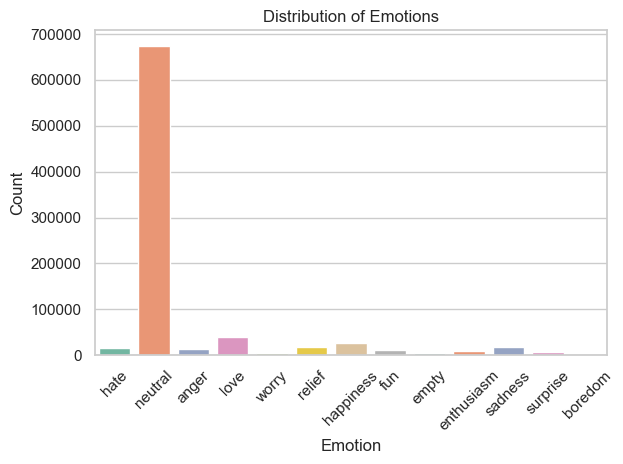

In [15]:
# visualized plot for emotions
sns.set(style="whitegrid")
sns.countplot(data=df, x='Emotion', palette='Set2')
import matplotlib.pyplot as plt
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Data pre-processing

In [17]:
import neattext.functions as nfx
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into a single string
    return ' '.join(lemmatized_tokens)


# Convert text to lowercase before other operations
df['Clean_Text'] = df['text'].str.lower()

df['Clean_Text'] = df['Clean_Text'].apply(tokenize_and_lemmatize)

# Then apply your existing cleaning operations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

df['Clean_Text'] = df['Clean_Text'].apply(nfx.fix_contractions)

# Remove URLs
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_urls)

# Remove email addresses
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emails)

# Remove numbers (if they aren't relevant for emotion detection)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_numbers)

# Remove special characters and punctuation
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df

,text,Emotion,Clean_Text
0,i seriously hate one subject to death but now ...,hate,i seriously hate one subject to death but now ...
1,im so full of life i feel appalled,neutral,im so full of life i feel appalled
2,i sit here to write i start to dig out my feel...,neutral,i sit here to write i start to dig out my feel...
3,ive been really angry with r and i feel like a...,anger,ive been really angry with r and i feel like a...
4,i feel suspicious if there is no one outside l...,neutral,i feel suspicious if there is no one outside l...
...,...,...,...
839550,i feel like telling these horny devils to find...,neutral,i feel like telling these horny devil to find ...
839551,i began to realize that when i was feeling agi...,neutral,i began to realize that when i wa feeling agit...
839552,i feel very curious be why previous early dawn...,neutral,i feel very curious be why previous early dawn...
839553,i feel that becuase of the tyranical nature of...,neutral,i feel that becuase of the tyranical nature of...


### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [21]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Training the model

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipe_lr = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9926568241508894

In [ ]:
# pipe_svm = Pipeline(steps=[('tfidf', TfidfVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
# pipe_svm.fit(x_train,y_train)
# pipe_svm.score(x_test,y_test)

In [ ]:
# pipe_rf = Pipeline(steps=[('tfidf', TfidfVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
# pipe_rf.fit(x_train,y_train)
# pipe_rf.score(x_test,y_test)

0.3377899592218731

In [25]:
# Add this in a new cell after all models are trained

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Store model scores
models = {
    'Logistic Regression': pipe_lr,
    # 'Support Vector Machine': pipe_svm,
    # 'Random Forest': pipe_rf
}

# Identify best model
best_model_name = max(models.items(), key=lambda x: x[1].score(x_test, y_test))[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {best_model.score(x_test, y_test):.4f}")

# Get predictions from best model
y_pred = best_model.predict(x_test)

# Detailed classification report for best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))


Best Model: Logistic Regression with accuracy: 0.9927

Classification Report for Best Model:
              precision    recall  f1-score   support

       anger       0.98      0.95      0.96      2489
     boredom       1.00      0.48      0.65        21
       empty       1.00      0.93      0.96      1096
  enthusiasm       1.00      0.97      0.98      1839
         fun       0.99      0.92      0.96      1977
   happiness       0.99      0.98      0.98      5370
        hate       0.99      0.98      0.99      3018
        love       0.99      0.99      0.99      8001
     neutral       0.99      1.00      1.00    134999
      relief       0.99      0.95      0.97      3396
     sadness       1.00      0.96      0.98      3428
    surprise       0.99      0.97      0.98      1372
       worry       0.96      0.88      0.92       905

    accuracy                           0.99    167911
   macro avg       0.99      0.92      0.95    167911
weighted avg       0.99      0.99      0

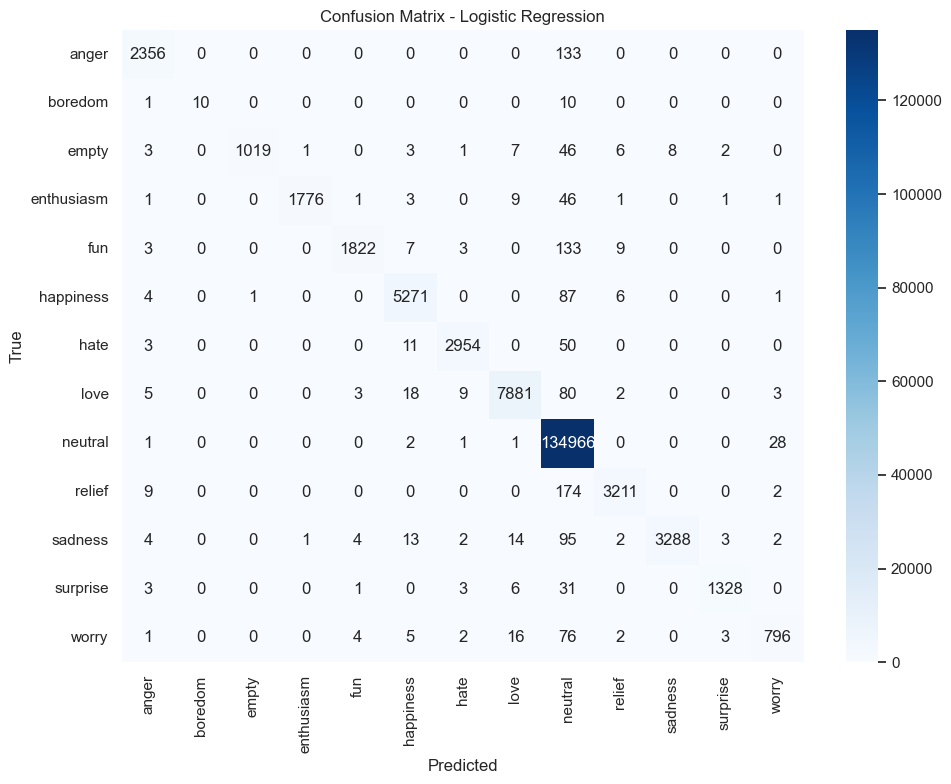

In [26]:
# Create confusion matrix for best model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
emotion_labels = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=emotion_labels, 
            yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.tight_layout()
plt.show()

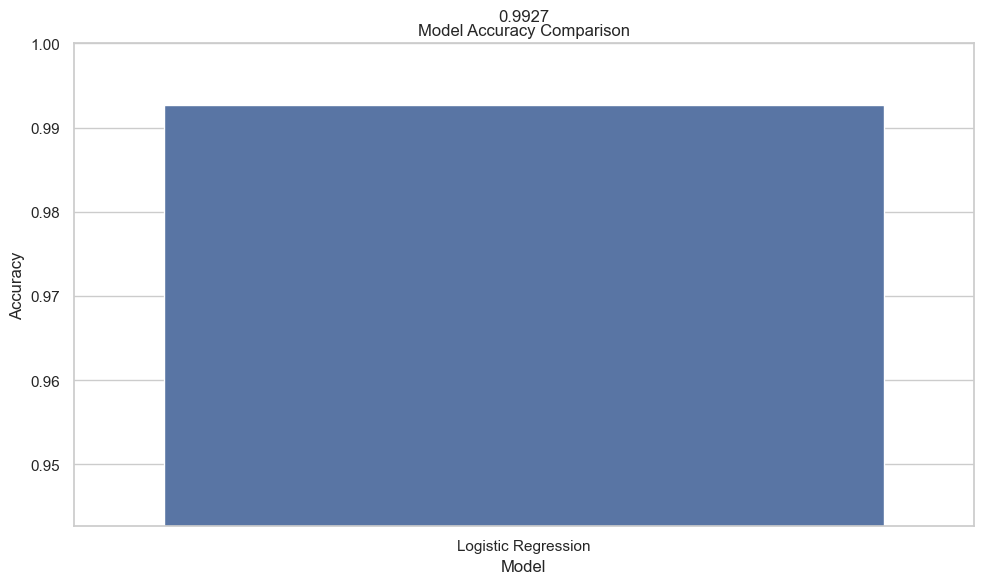

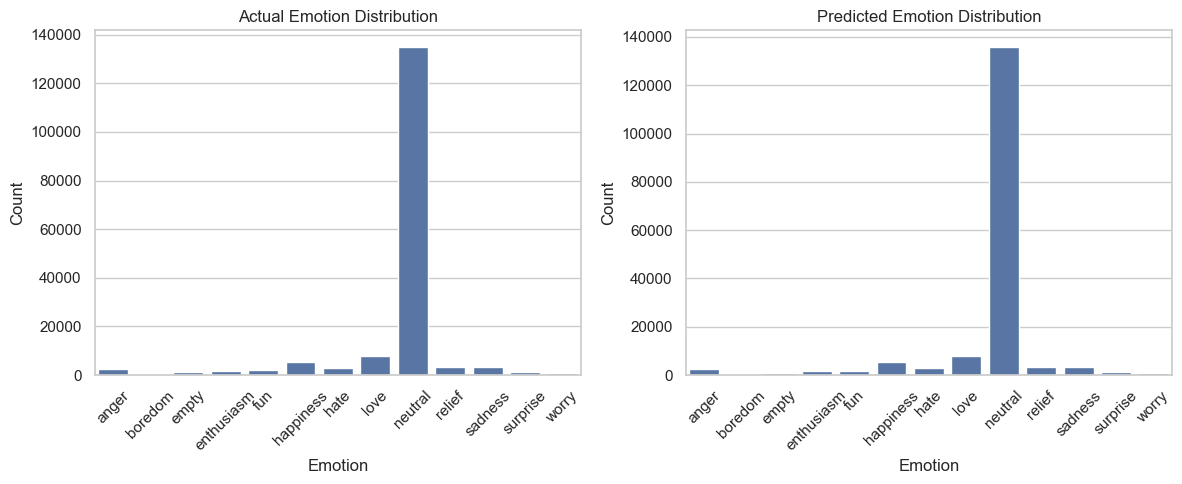

In [29]:

# Plot model comparison
accuracies = [model.score(x_test, y_test) for model in models.values()]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies)-0.05, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, f'{acc:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Plot actual vs predicted emotions distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, order=emotion_labels)
plt.title('Actual Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x=y_pred, order=emotion_labels)
plt.title('Predicted Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Saving the model

In [ ]:
# import joblib
# pipeline_file = open("text(SVM)_emotion.pkl","wb")
# joblib.dump(pipe_svm,pipeline_file)
# pipeline_file.close()

In [28]:
import joblib
pipeline_file = open("text_lr_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
# import joblib
# pipeline_file = open("text(RF)_emotion.pkl","wb")
# joblib.dump(pipe_rf,pipeline_file)
# pipeline_file.close()

In [ ]:
# Example emotion prediction function for new text inputs

def preprocess_text(text):
    """Clean and preprocess input text"""
    # Convert to lowercase
    text = text.lower()
    
    # Apply cleaning operations using neattext
    text = nfx.remove_userhandles(text)
    text = nfx.fix_contractions(text)
    text = nfx.remove_urls(text)
    text = nfx.remove_emails(text)
    text = nfx.remove_numbers(text)
    text = nfx.remove_special_characters(text)
    
    # Tokenize and lemmatize
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a string
    return ' '.join(lemmatized_tokens)

def predict_emotion(text):
    """Predict emotion from text input"""
    # Load model
    model = joblib.load("text_emotion.pkl")
    
    # Preprocess the text
    clean_text = preprocess_text(text)
    
    # Make prediction
    emotion = model.predict([clean_text])[0]
    
    return emotion

# Test with example sentences
examples = [
    "I'm so happy today! Everything is wonderful!",
    "I feel so sad and alone right now",
    "That movie was absolutely disgusting",
    "I'm terrified of what might happen next",
    "I was surprised by the ending of that book",
    "I'm so angry I could scream"
]

# Display predictions
print("Example Emotion Predictions:")
print("-" * 50)
for text in examples:
    emotion = predict_emotion(text)
    print(f"Text: {text}")
    print(f"Predicted Emotion: {emotion.upper()}")
    print("-" * 50)

# Interactive testing
user_text = input("Enter your own text to analyze: ")
emotion = predict_emotion(user_text)
print(f"Predicted Emotion: {emotion.upper()}")

Example Emotion Predictions:
--------------------------------------------------
Text: I'm so happy today! Everything is wonderful!
Predicted Emotion: JOY
--------------------------------------------------
Text: I feel so sad and alone right now
Predicted Emotion: SADNESS
--------------------------------------------------
Text: That movie was absolutely disgusting
Predicted Emotion: NEUTRAL
--------------------------------------------------
Text: I'm terrified of what might happen next
Predicted Emotion: FEAR
--------------------------------------------------
Text: I was surprised by the ending of that book
Predicted Emotion: SURPRISE
--------------------------------------------------
Text: I'm so angry I could scream
Predicted Emotion: ANGER
--------------------------------------------------
Predicted Emotion: NEUTRAL
